# Is the programming language want to be worked influenced by the profession?

In [7]:
import pandas as pd
import numpy as np

### Fetch the data

In [8]:
#read from file
df_2018 = pd.read_csv("./data/survey_results_public_2018.csv", low_memory=False)
df_2019 = pd.read_csv("./data/survey_results_public_2019.csv")
df_2020 = pd.read_csv("./data/survey_results_public_2020.csv")
df_2021 = pd.read_csv("./data/survey_results_public_2021.csv")

In [9]:
df_merged1 = pd.concat([df_2018, df_2019], sort=False)
df_merged2 = pd.concat([df_2020, df_2021], sort=False)
df_merged = pd.concat([df_merged1, df_merged2], sort=False)

In [10]:
#check the length of the merged dataframe
len(df_2018) + len(df_2019) + len(df_2020) + len(df_2021) == len(df_merged)

True

### Data Cleaning

In [11]:
#Let's look at column names
list(df_merged.columns.values)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [12]:
#search for dev type
df_merged["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                              21458
Developer, back-end                                                                                                                                                                                                                                                                                                                13466
Back-end developer                                                                                                                                                                                                                                                                                                                  6417
Full-stack de

In [13]:
#check if DevType column exists on all dataframes
np.sum(df_merged.isnull()["DevType"] == True)

46351

In [14]:
#There are some NULL values, then we can wonder if there is a dataframe which doesn't contain DevType column
"DevType" in list(df_2018.columns.values) and \
"DevType" in list(df_2019.columns.values) and \
"DevType" in list(df_2020.columns.values) and \
"DevType" in list(df_2021.columns.values) 

True

In [31]:
# Now, it is the order for the programming language which is want to be worked with
df_merged["LanguageDesireNextYear"].value_counts()

Python                                                                                    3296
C#                                                                                        1662
Java                                                                                      1532
Go                                                                                        1278
HTML/CSS;JavaScript;TypeScript                                                            1147
HTML/CSS;JavaScript                                                                       1107
JavaScript                                                                                1099
Kotlin                                                                                    1098
Swift                                                                                     1094
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                      969
Rust                                              

In [33]:
#check if LanguageDesireNextYear column exists on all dataframes
np.sum(df_merged.isnull()["LanguageDesireNextYear"] == True)

124193

In [15]:
#This number is quite high, so we can check the column names of all dataframes
"LanguageDesireNextYear" in list(df_2018.columns.values) and \
"LanguageDesireNextYear" in list(df_2019.columns.values) and \
"LanguageDesireNextYear" in list(df_2020.columns.values) and \
"LanguageDesireNextYear" in list(df_2021.columns.values) 

False

In [16]:
#As it can be seen, we can include one more column to cover all data and it is LanguageWantToWorkedWith in df_2021
"LanguageWantToWorkWith" in list(df_2021.columns.values) 

True

In [17]:
#Create a combined colum which gather LanguageDesireNextYear from 2018, 2019 and 2020; LanguageWantToWorkWith from 2021
idx = len(df_2021)
remaining_index = len(df_merged) - idx 
new_column = df_merged["LanguageDesireNextYear"][0:remaining_index].values.tolist()
new_column.extend(df_merged["LanguageWantToWorkWith"][remaining_index:].values.tolist())

In [18]:
len(new_column) == len(df_merged)

True

In [19]:
df_merged["DesiredLang"] = new_column

In [20]:
#Drop the nan values
df_merged.dropna(subset=["DevType", "DesiredLang"], inplace=True)

In [55]:
#For simplicity, we will analyze for 4 Developer type: ["Backend", "Frontend", "Data Scientist", "Mobile developer"]
df_merged["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                         19634
Developer, back-end                                                                                                                                                                                                                                                           12462
Developer, front-end                                                                                                                                                                                                                                                           5472
Back-end developer                                                                                                                                                          

In [21]:
types = ["Developer, back-end", "Back-end developer", "Developer, front-end", "Front-end developer", "Data scientist or machine learning specialist", "Mobile developer"]
df_sampled = df_merged[df_merged["DevType"].isin(types)]

In [22]:
df_sampled.shape

(29367, 237)

### Analysis

In [23]:
#Now first, we will look at the general situation of desired language. 
desired_langs = df_merged["DesiredLang"].value_counts().to_dict()

In [24]:
filtered = {k: v for k, v in desired_langs.items() if v >= 1000}

In [25]:
import matplotlib.pyplot as plt
plt.pie(list(filtered.values()), labels=list(filtered.keys()), autopct='%1.0f%%')
plt.show()

<Figure size 640x480 with 1 Axes>

In [26]:
backend_dict = df_sampled[df_sampled["DevType"].isin(["Developer, back-end", "Back-end developer"])]["DesiredLang"].value_counts().to_dict()
backend_filtered = {k: v for k, v in backend_dict.items() if v >= 100}

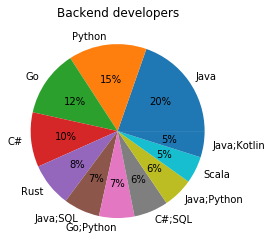

In [28]:
plt.pie(list(backend_filtered.values()), labels=list(backend_filtered.keys()), autopct='%1.0f%%')
plt.title("Backend developers")
plt.show()

In [30]:
frontend_dict = df_sampled[df_sampled["DevType"].isin(["Developer, front-end", "Front-end developer"])]["DesiredLang"].value_counts().to_dict()
frontend_filtered = {k: v for k, v in frontend_dict.items() if v >= 100}

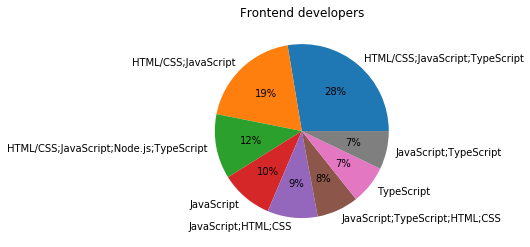

In [31]:
plt.pie(list(frontend_filtered.values()), labels=list(frontend_filtered.keys()), autopct='%1.0f%%')
plt.title("Frontend developers")
plt.show()

In [32]:
ds_dict = df_sampled[df_sampled["DevType"].isin(["Data scientist or machine learning specialist"])]["DesiredLang"].value_counts().to_dict()
ds_filtered = {k: v for k, v in ds_dict.items() if v >= 50}

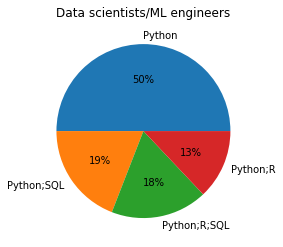

In [33]:
plt.pie(list(ds_filtered.values()), labels=list(ds_filtered.keys()), autopct='%1.0f%%')
plt.title("Data scientists/ML engineers")
plt.show()

In [34]:
mobile_dict = df_sampled[df_sampled["DevType"].isin(["Mobile developer"])]["DesiredLang"].value_counts().to_dict()
mobile_filtered = {k: v for k, v in mobile_dict.items() if v >= 50}

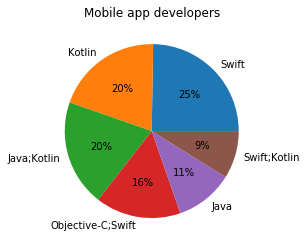

In [35]:
plt.pie(list(mobile_filtered.values()), labels=list(mobile_filtered.keys()), autopct='%1.0f%%')
plt.title("Mobile app developers")
plt.show()